# Number density and bias with real data

In [2]:
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Calling Gold mask and calculating map area

In [293]:
# calling map 
GoldMask = callingEliGoldMask()
GoldMask_st82 = Cuts.SpatialCuts(GoldMask, ra=320, ra2=360, dec=-2, dec2=2)
#GoldMask_st82 = GoldMask[ GoldMask['DEC'] > -3.0 ]
GoldMask_spt = GoldMask[ GoldMask['DEC'] < -3.0 ]
#GoldMask_spt = Cuts.SpatialCuts(GoldMask_spt, ra=0, ra2 = 100, dec=-52, dec2 = -48)

pixarea = hp.nside2pixarea( 4096, degrees = True)
sptnpix = GoldMask_spt['PIXEL'].size #hp.get_map_size( GoldMask_spt['PIXEL'] )
st82npix =  GoldMask_st82['PIXEL'].size # hp.get_map_size( GoldMask_st82 )
SPTMaparea = pixarea * sptnpix
ST82Maparea = pixarea * st82npix

Spatial Cut  530537


##### DES + GOLD catalogs 

In [180]:
merged_des_basicCut = []
for i in range(20):
    ds = io.getDESY1A1catalogs(keyword = 'basicCut{:02}'.format(i), gold=True)
    ds, _ = priorCut( ds )
    merged_des_basicCut.append(ds)
    ds = None
    
merged_des_basicCut = np.hstack(merged_des_basicCut)

merged_des_gold_basicCut00.fits
prior cut  814133
merged_des_gold_basicCut01.fits
prior cut  885458
merged_des_gold_basicCut02.fits
prior cut  913841
merged_des_gold_basicCut03.fits
prior cut  916401
merged_des_gold_basicCut04.fits
prior cut  898696
merged_des_gold_basicCut05.fits
prior cut  895023
merged_des_gold_basicCut06.fits
prior cut  873493
merged_des_gold_basicCut07.fits
prior cut  870319
merged_des_gold_basicCut08.fits
prior cut  868282
merged_des_gold_basicCut09.fits
prior cut  857597
merged_des_gold_basicCut10.fits
prior cut  865086
merged_des_gold_basicCut11.fits
prior cut  884334
merged_des_gold_basicCut12.fits
prior cut  680860
merged_des_gold_basicCut13.fits
prior cut  342693
merged_des_gold_basicCut14.fits
prior cut  408227
merged_des_gold_basicCut15.fits
prior cut  862195
merged_des_gold_basicCut16.fits
prior cut  799283
merged_des_gold_basicCut17.fits
prior cut  799905
merged_des_gold_basicCut18.fits
prior cut  461819
merged_des_gold_basicCut19.fits
prior cut  29626


In [294]:
# calling gold + des catalog
#merged_des_st82 = fitsio.read('result_cat/merged_des_st82_nocut.fits') # in stripe82
#merged_des_patch = fitsio.read('result_cat/merged_des_spt_nocut.fits') # spt 0<ra<100, -52<dec<-48
#merged_des_basicCut = fitsio.read('/n/des/lee.5922/data/gold_cat/merged_des_gold_basicCut.fits')


#merged_des_basicCut = io.getDESY1A1catalogs(keyword = 'basicCut', gold=True)
# prior Cut, limit survey depth
merged_des_basicCut = fitsio.read('result_cat/merged_des_basicCut_priorCut.fits')
merged_des_st82_s = Cuts.SpatialCuts(merged_des_basicCut, ra=320, ra2=360, dec=-2, dec2=2)
#merged_des_patch_s = Cuts.SpatialCuts(merged_des_basicCut, ra=0, ra2=100, dec=-52, dec2=-48)
merged_des_patch_s = merged_des_basicCut[merged_des_basicCut['DEC'] < -3]
merged_des_basicCut = None

#from cmass_modules import Cuts
#merged_des_st82_s  = Cuts.doBasicCuts( merged_des_st82 )
#merged_des_patch_s = Cuts.doBasicCuts( merged_des_patch )
#merged_des_st82_s, _ = priorCut( merged_des_st82_s )
#merged_des_patch_s, _ = priorCut( merged_des_patch_s )
#merged_des_patch_s = merged_des_patch_s[(merged_des_patch_s['RA'] < 90)]# & (merged_des_patch_s['RA'] > 10)]

Spatial Cut  1117797


In [4]:
merged_des_st82 = fitsio.read('/n/des/lee.5922/data/gold_cat/coadd_gold_st82.fits')
merged_des_st82 = merged_des_st82[( merged_des_st82['MODEST_CLASS'] == 1) ]

----

#### Flags regional difference 

prior cut  1942190
prior cut  3414531
422463 2992068


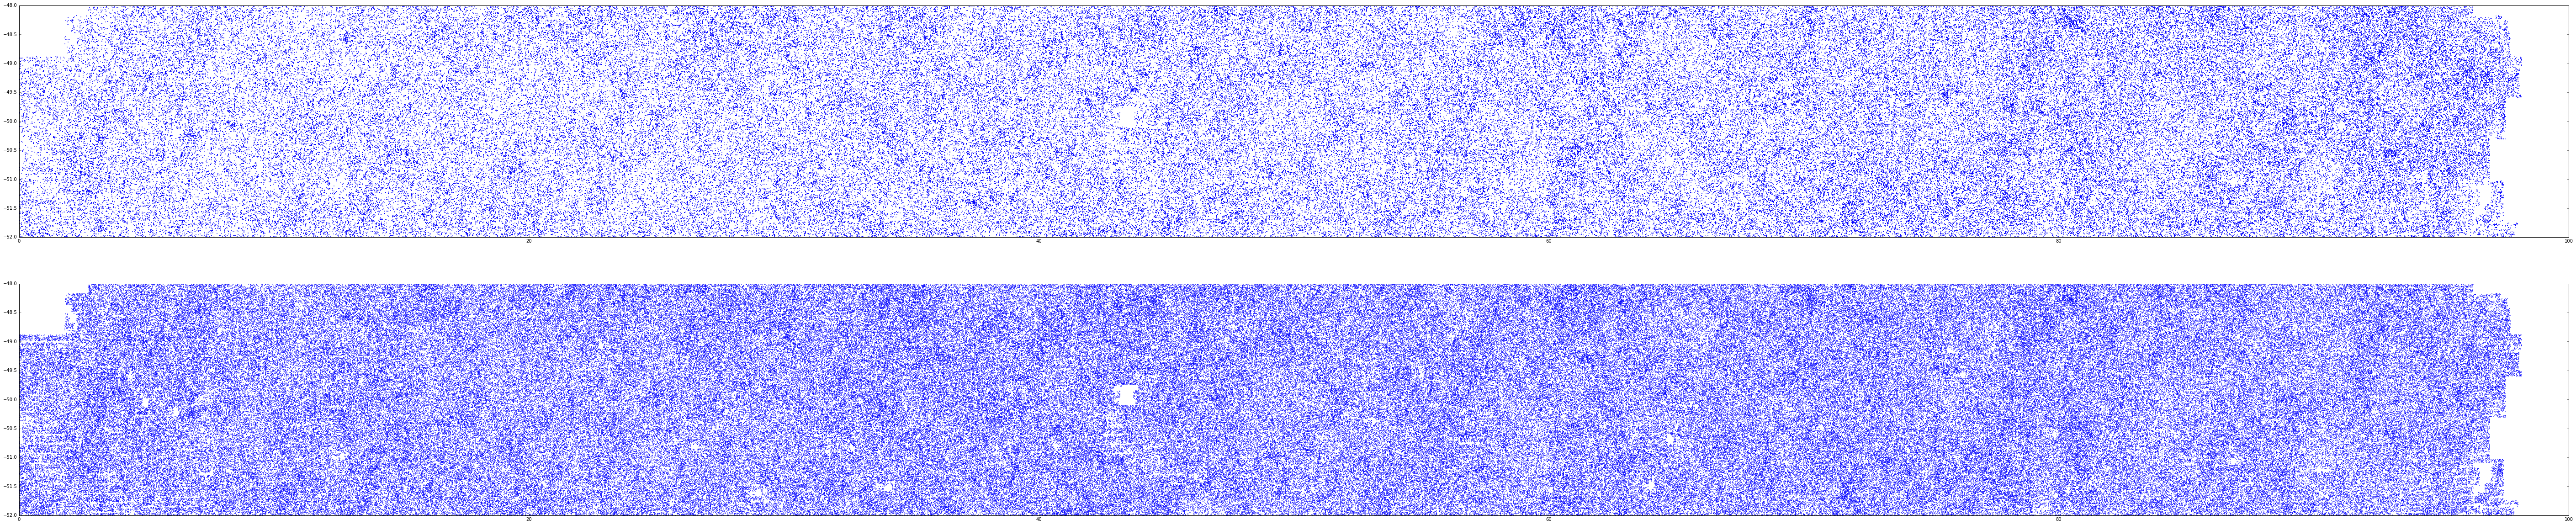

In [21]:
merged_des_st82, _ = priorCut( merged_des_st82 )
merged_des_patch, _ = priorCut( merged_des_patch )

flagmask = ((merged_des_patch['FLAGS_G'] > 2) & (merged_des_patch['FLAGS_R'] > 2)& \
            (merged_des_patch['FLAGS_I'] > 2) & (merged_des_patch['FLAGS_Z'] > 2))

exclude = merged_des_patch[flagmask]
keep = merged_des_patch[~flagmask]

print exclude.size, keep.size

row = np.random.choice(np.arange(exclude.size), size = exclude.size)
row2 = np.random.choice(np.arange(keep.size), size = keep.size/5)

fig, (ax, ax2) = plt.subplots(2, 1, figsize = (100, 20))
ax.plot( exclude[row]['RA'], exclude[row]['DEC'], '.', markersize = 2)
ax2.plot( keep[row2]['RA'], keep[row2]['DEC'], '.', markersize = 2)

----

In [199]:
####### delete below line later #########
#merged_des_st82_s21 = merged_des_st82_s[merged_des_st82_s['MAG_AUTO_I_corrected'] <= 21]
#merged_des_patch_s21 = merged_des_patch_s[merged_des_patch_s['MAG_AUTO_I_corrected'] <= 21]
####### delete below line later #########

####### delete below line later #########
merged_des_st82_s = merged_des_st82_s[merged_des_st82_s['MAG_AUTO_I_corrected'] <= 21]
merged_des_patch_s = merged_des_patch_s[merged_des_patch_s['MAG_AUTO_I_corrected'] <= 21]
####### delete below line later #########

figsave : figure/spatialtest_.png
1265.88758983 108.710042151


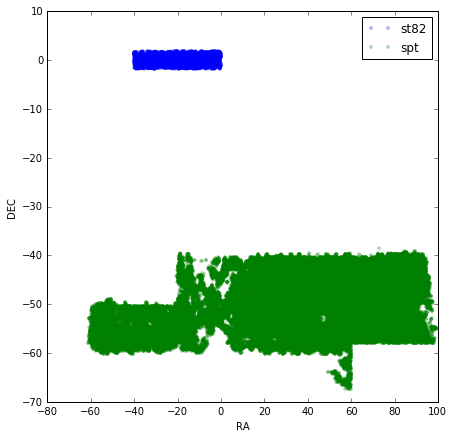

In [200]:
rows = np.random.choice(merged_des_st82_s.size, size = merged_des_st82_s.size/100)
rows2 = np.random.choice(merged_des_patch_s.size, size = merged_des_patch_s.size/100)
spatialcheck([merged_des_st82_s[rows], merged_des_patch_s[rows2]], label=['st82', 'spt'])
print SPTMaparea, ST82Maparea

Check spatial map

In [201]:
#check number density after prior Cut
n_spt = merged_des_patch_s.size * 1./SPTMaparea
n_st82 = merged_des_st82_s.size * 1./ST82Maparea
print 'number density (patch, st82) ', n_spt, n_st82,  '  ',n_spt*1./ n_st82 * 100, '%'

number density (patch, st82)  4847.2123823 4830.93364339    100.336968796 %


##### CMASS in des catalog 

In [5]:
# calling cmass

cmass = io.getSGCCMASSphotoObjcat()
cmass = Cuts.SpatialCuts(cmass, ra=320, ra2=360, dec=-2, dec2=2)
cmass = Cuts.keepGoodRegion(cmass)
print 'num of cmass in train region', cmass.size
m1, m2, _ = esutil.htm.HTM(10).match(cmass['RA'], cmass['DEC'], merged_des_st82['RA'], \
                                     merged_des_st82['DEC'], 1./3600, maxmatch=1)
cmass_mask = np.zeros(merged_des_st82.size, dtype=bool)
cmass_mask[m2] = 1
clean_cmass_data_des, nocmass = merged_des_st82[cmass_mask], merged_des_st82[~cmass_mask]
print 'num of cmass in des side', clean_cmass_data_des.size, '({:0.0f}%)'.format(clean_cmass_data_des.size*1./cmass.size * 100)

Applying Healpix BOSS SGC footprint mask
Spatial Cut  15244
num of cmass in train region 10641
num of cmass in des side 10125 (95%)


In [51]:
merged_des_st82_s = Cuts.doBasicCuts(merged_des_st82, suffix = '')
merged_des_st82_s = merged_des_st82_s[merged_des_st82_s['MAG_AUTO_I'] <= 21]

do Basic Cut 2713501


In [239]:
#fitsio.write('result_cat/clean_cmass_data_des.fits',clean_cmass_data_des, clobber = True)

##### Assigning CMASS membership probability with XD algorithm 

In [52]:
# Divide sample into train and test
#(trainInd, testInd), _ = split_samples(merged_des_st82_s, merged_des_st82_s, [0.9,0.1], random_state=0)
#des_train = merged_des_st82_s[trainInd]
#des_test = merged_des_st82_s[testInd]

no_train, no_test = [0.1,0.9]
train_ind = np.random.choice( merged_des_st82_s.size, size = int(merged_des_st82_s.size * no_train))
train_mask = np.zeros(merged_des_st82_s.size, dtype = bool)
train_mask[train_ind] = 1
des_train = merged_des_st82_s[train_mask]
des_test = merged_des_st82_s[~train_mask]

m1, m2 = esutil.numpy_util.match(clean_cmass_data_des['COADD_OBJECTS_ID'], des_train['COADD_OBJECTS_ID'])
cmass_mask = np.zeros(des_train.size, dtype=bool)
cmass_mask[m2] = 1
cmass_train, nocmass_train = des_train[cmass_mask], des_train[~cmass_mask]

m1, m2 = esutil.numpy_util.match(clean_cmass_data_des['COADD_OBJECTS_ID'], des_test['COADD_OBJECTS_ID'])
cmass_mask = np.zeros(des_test.size, dtype=bool)
cmass_mask[m2] = 1
cmass_test, _ = des_test[cmass_mask], des_test[~cmass_mask]

print cmass_train.size, cmass_test.size, des_train.size, des_test.size

951 9126 67962 646966


In [53]:
print \
clean_cmass_data_des.size * 1./merged_des_st82_s.size, \
cmass_train.size*1./des_train.size, \
cmass_test.size*1./des_test.size # test is always small..why?

0.0141622652911 0.0139931137989 0.0141058417289


In [259]:
# Fitting
#pickleFileName = 'pickle/gold_st82_cut21_XD_no.pkl' #
pickleFileName = 'pickle/gold_st82_23_cut21_XD_no.pkl'
#rows = np.random.choice(nocmass_train.size, size=nocmass_train.size/10)                    
clf_no = XD_fitting( nocmass_train, pickleFileName = pickleFileName, \
                  init_params=None, suffix = '_no', n_cl = 25 )
#pickleFileName =  'pickle/gold_st82_cut21_XD_cmass.pkl' #
#pickleFileName = 'pickle/gold_st82_24_cut21_XD_cmass.pkl'
pickleFileName = 'pickle/gold_st82_23_cut21_XD_cmass.pkl'
clf_cmass = XD_fitting( clean_cmass_data_des, pickleFileName = pickleFileName, \
                  #init_params= 'pickle/gold_st82_20_XD_cmass.pkl',\
                       suffix = '_cmass', n_cl = 10 )

@pickle_results: using precomputed results from 'pickle/gold_st82_23_cut21_XD_no.pkl'
@pickle_results: using precomputed results from 'pickle/gold_st82_23_cut21_XD_cmass.pkl'


In [260]:
#cmass_fraction = cmass_train.size*1./des_train.size #0.015029276573 ratio of train #24 : 0.0152616957143
cmass_fraction = .0152432081478
cmass_fraction = clean_cmass_data_des.size *1./merged_des_st82_s.size
print 'cmass_fraction', cmass_fraction
from xd import assignCMASSProb
merged_des_st82_s = assignCMASSProb( merged_des_st82_s, clf_cmass, clf_no, cmass_fraction = cmass_fraction )
des_train = merged_des_st82_s[train_mask]
des_test = merged_des_st82_s[~train_mask]

cmass_fraction 0.0152616957143
calculate loglikelihood gaussian with multiprocessing module
multiprocessing 100 % 


save fig: com_pur_results/gold_st82_24_train_probability_calibration.png
save fig: com_pur_results/gold_st82_24_test_probability_calibration.png
save fig: com_pur_results/gold_st82_24_probability_calibration.png


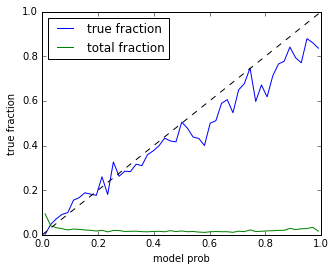

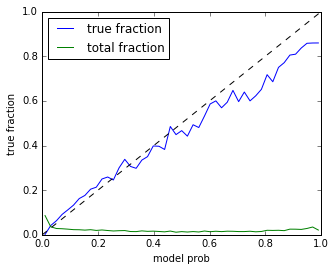

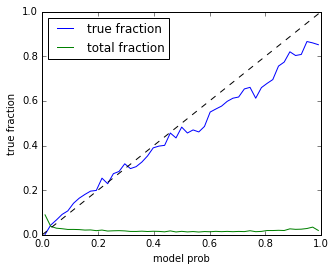

In [261]:
probability_calibration( des = des_train, cmass_des = cmass_train, \
                        matchID= 'COADD_OBJECTS_ID', prefix = 'gold_st82_24_train' )
probability_calibration( des = des_test, cmass_des = cmass_test, \
                        matchID= 'COADD_OBJECTS_ID', prefix = 'gold_st82_24_test' )
probability_calibration( des = merged_des_st82_s, cmass_des = clean_cmass_data_des, \
                        matchID= 'COADD_OBJECTS_ID', prefix = 'gold_st82_24' )

##### DMASS sampling

In [262]:
dmass_train, _ = resampleWithPth( des_train, pstart = 0, pmax = 1.0 )
print 100. * dmass_train.size/ cmass_train.size, '%'
dmass_test, _ = resampleWithPth( des_test, pstart = 0, pmax = 1.0 )
print 100. * dmass_test.size/ cmass_test.size, '%'
dmass, _ = resampleWithPth( merged_des_st82_s, pstart = 0, pmax = 1.0 )
print 100. * dmass.size/ clean_cmass_data_des.size, '%'

#esutil.io.write('result_cat/gold_st82_24_cut21_dmass_st82.fits', dmass, clobber = True)

93.8081488611 %
93.7525520621 %
93.9114160948 %


writing output plot to: figure/gold_st82_23_cut21_st82_diagnostic_histograms_1d.png
writing output plot to: figure/gold_st82_23_cut21_dmass_diagnostic_histograms_1d.png
writing output plot to: figure/gold_st82_23_cut21_all_diagnostic_histograms_1d.png
writing output plot to: figure/gold_st82_23_cut21_all_diagnostic_histograms_1d.png


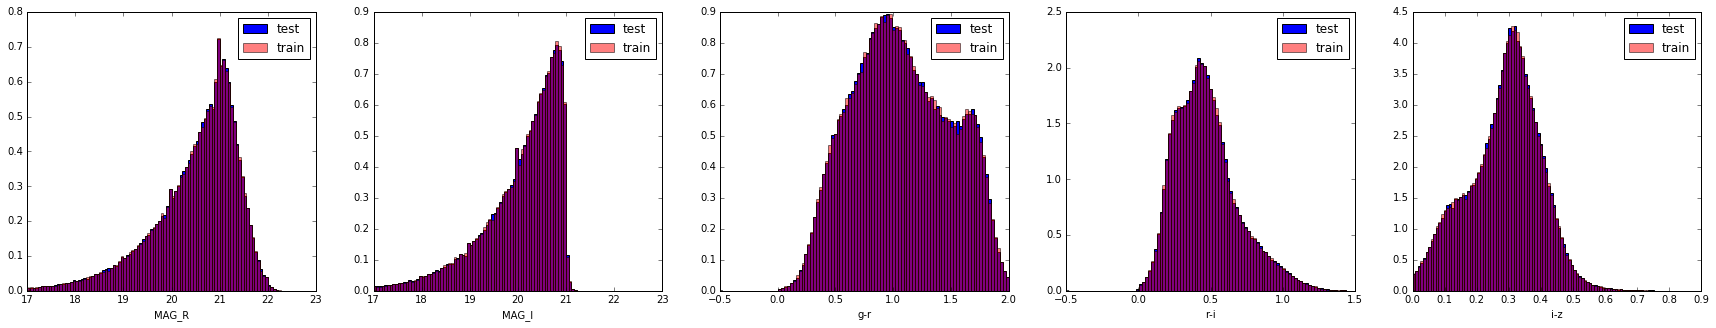

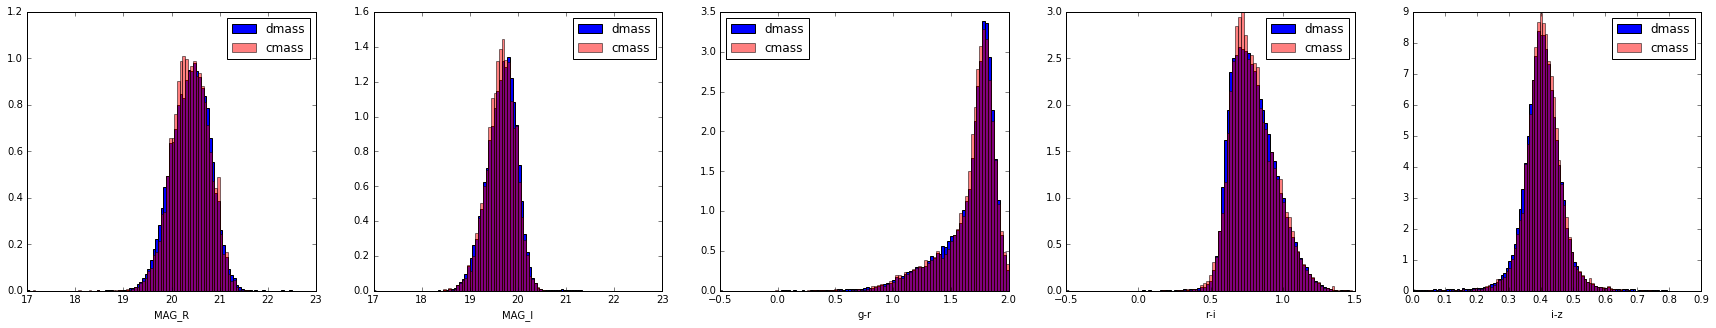

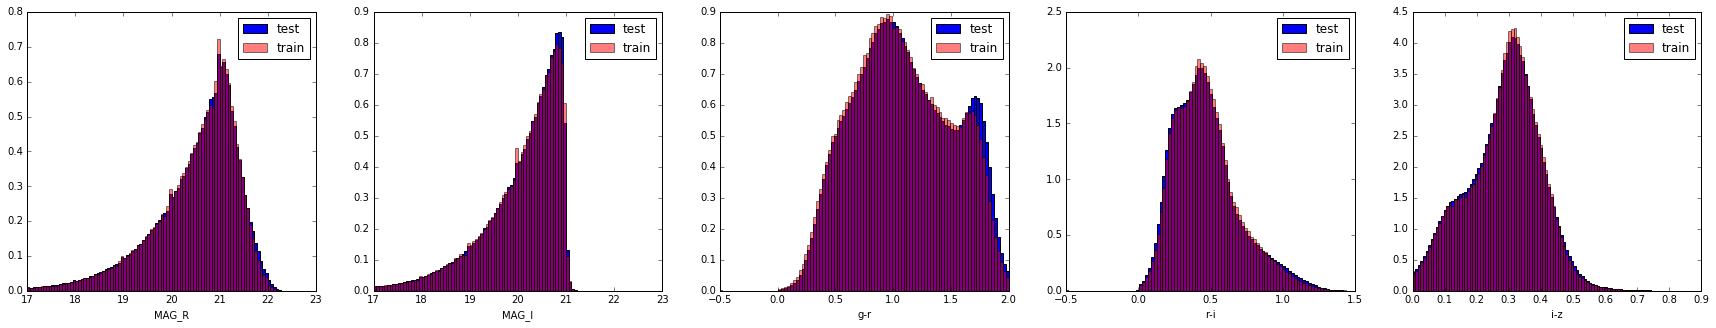

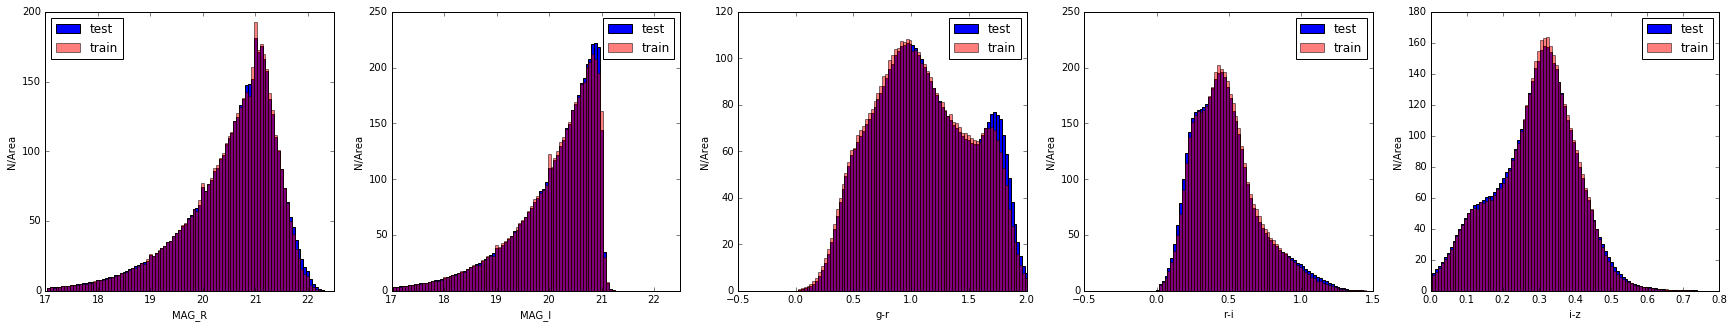

In [239]:
# Plotting all
labels = ['MAG_R', 'MAG_I', 'g-r', 'r-i', 'i-z']
ranges =  [[17,22.5], [17,22.5], [-0.5,2], [-.5,1.5], [0.0,.8]]

X_train, Xcov_train = mixing_color(des_train)
X_test,_ = mixing_color(des_test)
doVisualization_1d( X_train, X_test, labels = labels, ranges = ranges,\
                         name =['train','test' ], nbins=100, prefix='gold_st82_23_cut21_st82_')
# Plotting dmass
X_cmass,_ = mixing_color(clean_cmass_data_des)
X_dmass,_ = mixing_color(dmass_spt)
doVisualization_1d( X_cmass, X_dmass,  labels = labels, ranges = ranges,\
                         name =['cmass','dmass' ], nbins=100, prefix='gold_st82_23_cut21_dmass_')

X_st82, Xcov_st82 = mixing_color(merged_des_st82_s)
X_spt,_ = mixing_color(merged_des_patch_s)
doVisualization_1d( X_st82, X_spt, labels = labels, ranges = ranges,\
                         name =['train','test' ], nbins=100, prefix='gold_st82_23_cut21_all_')
doVisualization_1d_NperA( X_st82, X_spt, labels = labels, ranges = ranges,\
                         name =['train','test' ], area = [ST82Maparea, SPTMaparea], nbins=100, prefix='gold_st82_23_cut21_all_')

writing output plot to: figure/gold_st82_23_cut21_gr_diagnostic_histograms_1d.png


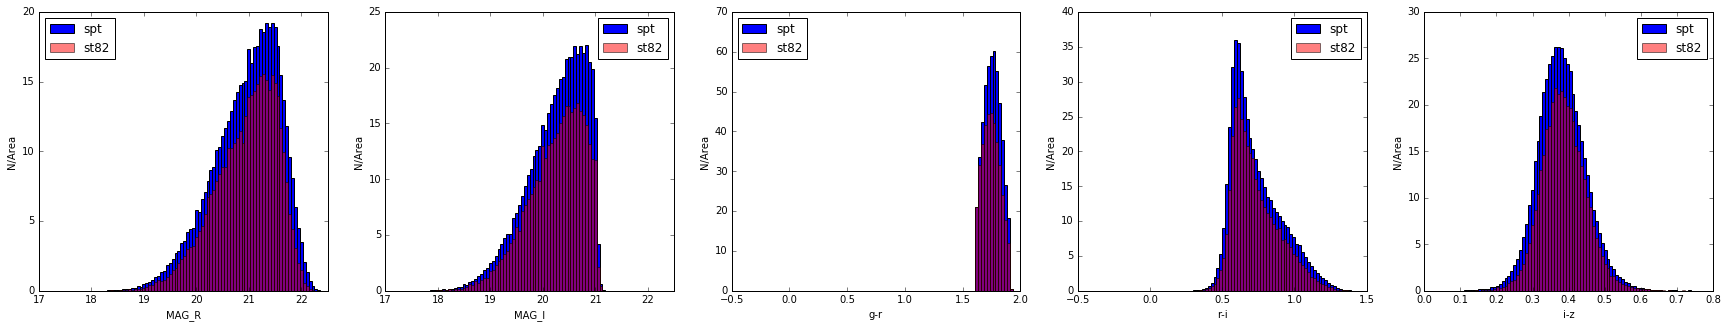

In [69]:
merged_gr_mask = ((merged_des_st82_s['MAG_MODEL_G_corrected'] - merged_des_st82_s['MAG_MODEL_R_corrected'] >= 1.6) &\
                 (merged_des_st82_s['MAG_MODEL_G_corrected'] - merged_des_st82_s['MAG_MODEL_R_corrected'] < 1.9) & \
                 (merged_des_st82_s['MAG_DETMODEL_G_corrected'] - merged_des_st82_s['MAG_DETMODEL_R_corrected'] >= 1.6) & \
                 (merged_des_st82_s['MAG_DETMODEL_G_corrected'] - merged_des_st82_s['MAG_DETMODEL_R_corrected'] < 1.9))
merged_gr_spt_mask = ((merged_des_patch_s['MAG_MODEL_G_corrected'] - merged_des_patch_s['MAG_MODEL_R_corrected'] >= 1.6) &\
                     (merged_des_patch_s['MAG_MODEL_G_corrected'] - merged_des_patch_s['MAG_MODEL_R_corrected'] < 1.9) & \
                     (merged_des_patch_s['MAG_DETMODEL_G_corrected'] - merged_des_patch_s['MAG_DETMODEL_R_corrected'] >= 1.6) &\
                     (merged_des_patch_s['MAG_DETMODEL_G_corrected'] - merged_des_patch_s['MAG_DETMODEL_R_corrected'] < 1.9))

merged_gr = merged_des_st82_s[merged_gr_mask]
merged_gr_spt = merged_des_patch_s[merged_gr_spt_mask]

X_st82, Xcov_st82 = mixing_color(merged_gr)
X_spt,_ = mixing_color(merged_gr_spt)
doVisualization_1d_NperA( X_st82, X_spt, labels = labels, ranges = ranges,\
                         name =['st82','spt' ], area=[ST82Maparea,SPTMaparea], nbins=100, prefix='gold_st82_23_cut21_gr_')


----

##### Error convolved distribution

In [143]:
cmass_model = clf_cmass.sample(cmass_train.size)
no_model = clf_no.sample(nocmass_train.size)

X_train, Xcov_train = mixing_color(des_train)
X_test,_ = mixing_color(des_test)

noisy_cmass_model = add_errors_multiprocessing(cmass_model, X_train[cmass_mask], Xcov_train[cmass_mask])
nosiy_no_model = add_errors_multiprocessing(no_model, X_train[~cmass_mask], Xcov_train[~cmass_mask])

IndexError: index 50078 is out of bounds for axis 0 with size 49999

writing output plot to: figure/model_cmass_diagnostic_histograms_1d.png
writing output plot to: figure/model_no_diagnostic_histograms_1d.png


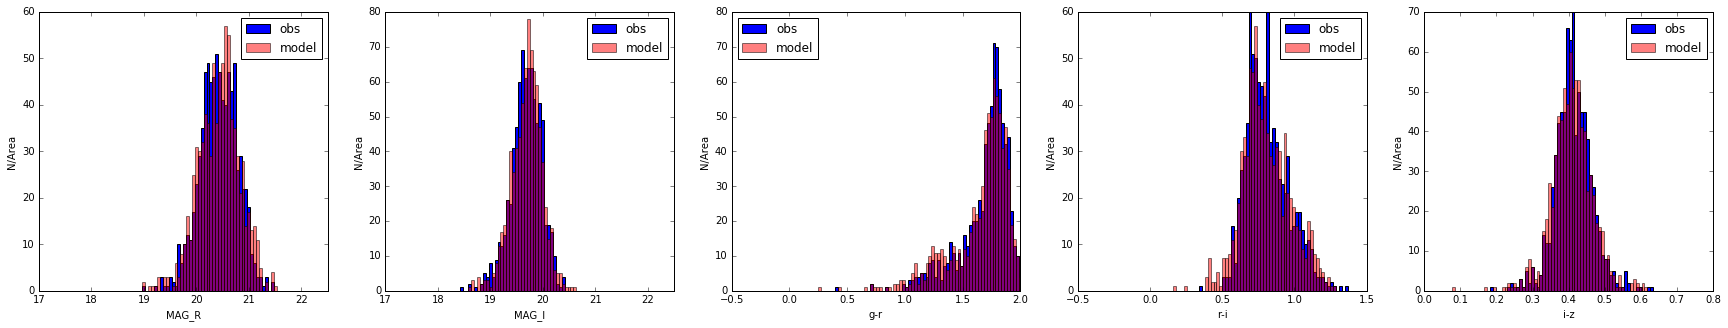

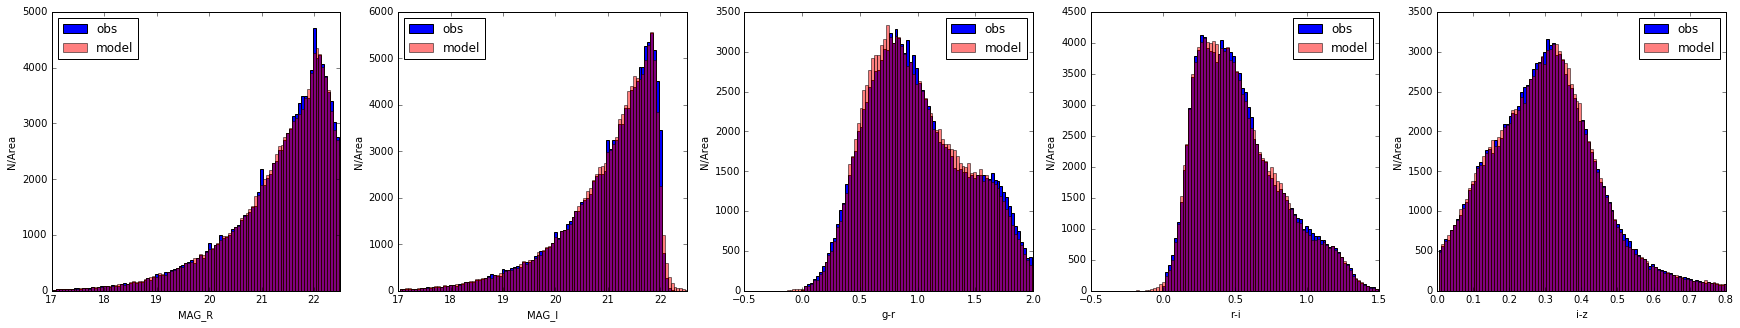

In [48]:
# Plotting all
labels = ['MAG_R', 'MAG_I', 'g-r', 'r-i', 'i-z']
ranges =  [[17,22.5], [17,22.5], [-.5,2], [-.5,1.5], [0.0,.8]]
doVisualization_1d_NperA( noisy_cmass_model, X_train[cmass_mask], area=[1,1], labels = labels, ranges = ranges,\
                         name =['model','obs' ], nbins=100, prefix='model_cmass_')
doVisualization_1d_NperA( nosiy_no_model, X_train[~cmass_mask], area=[1,1], labels = labels, ranges = ranges,\
                         name =['model','obs' ], nbins=100, prefix='model_no_')

##### underlying distribution

In [195]:
# Fitting
pickleFileName = 'pickle/gold_st82_21_XD_all.pkl'
rows = np.random.choice(des_train.size, size=int(des_train.size /10.)) 
clf_all = XD_fitting( des_train[rows], pickleFileName = pickleFileName, \
                  init_params= 'pickle/gold_st82_21_XD_no.pkl', suffix = '_all1', n_cl = 25 )
pickleFileName = 'pickle/gold_st82_21_XD_all_patch.pkl'
rows = np.random.choice(merged_des_patch_s.size, size=int(merged_des_patch_s.size /50.))                    
clf_all2 = XD_fitting( merged_des_patch_s[rows], pickleFileName = pickleFileName, \
                  init_params= 'pickle/gold_st82_21_XD_no.pkl', suffix = '_all2', n_cl = 25 )

@pickle_results: using precomputed results from 'pickle/gold_st82_21_XD_all.pkl'
@pickle_results: using precomputed results from 'pickle/gold_st82_21_XD_all_patch.pkl'


In [192]:
#rm pickle/gold_st82_21_XD_all.pkl pickle/gold_st82_21_XD_all_patch.pkl

writing output plot to: figure/model_diagnostic_histograms_1d.png


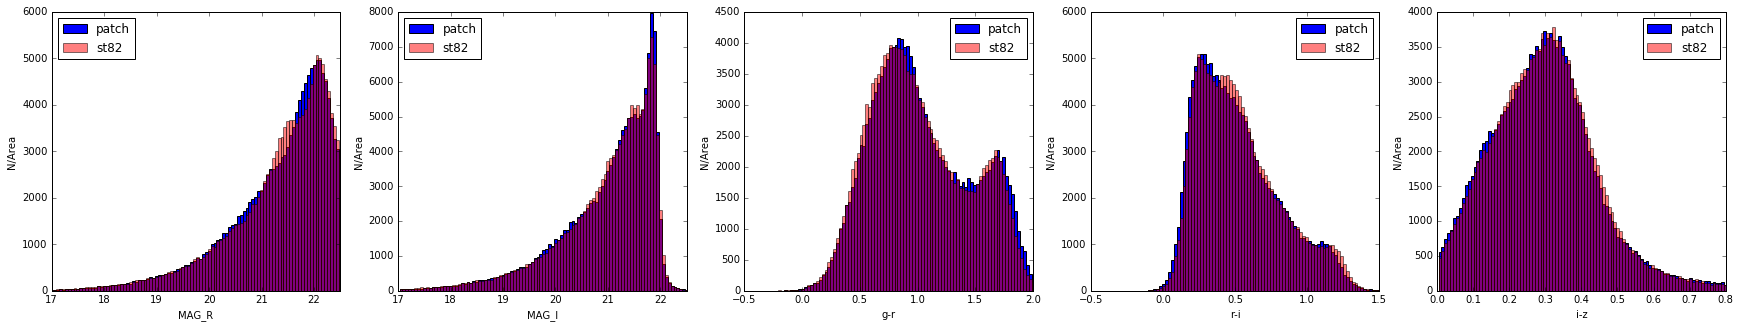

In [196]:
clean_all = clf_all.sample(des_train.size)
clean_all2 = clf_all2.sample(des_train.size)

labels = ['MAG_R', 'MAG_I', 'g-r', 'r-i', 'i-z']
ranges =  [[17,22.5], [17,22.5], [-.5,2], [-.5,1.5], [0.0,.8]]
doVisualization_1d_NperA( clean_all, clean_all2, area=[1,1], labels = labels, ranges = ranges,\
                         name =['st82','patch' ], nbins=100, prefix='model_')

----

## Density vs maglimit

In [12]:
# apply basic Cuts to maglim map
path = '/n/des/lee.5922/data/balrog_cat/'
goodmask = path+'y1a1_gold_1.0.2_wide_footprint_4096.fit'
badmask = path+'y1a1_gold_1.0.2_wide_badmask_4096.fit'
fraction = hp.read_map(path+'Y1A1_WIDE_frac_combined_griz_o.4096_t.32768_EQU.fits')

# Note that the masks here in in equatorial, ring format.
gdmask = hp.read_map(goodmask)
bdmask = hp.read_map(badmask)

ind_good_ring = np.where(( gdmask >= 1)
                         & ((bdmask.astype('int64') & (64+32+8)) == 0)
                         & (fraction > 0.8)
                         )

goldmask = np.zeros(gdmask.size, dtype=bool)
goldmask[ind_good_ring] = 1

path = '/n/des/lee.5922/data/systematic_maps/'
maglim_i = hp.read_map(path+'y1a1_gold_1.0.2_wide_auto_nside4096_i_10sigma.fits')
maglim_i[~goldmask] = hp.UNSEEN

NSIDE = 4096
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [3]:
# calling data w/o cuts
#des_gold_st82_list = []
des_gold_spt1_list = []
#des_gold_spt2_list = []
for i in range(3):
    des_gold = io.getDESY1A1catalogs(keyword = 'merged_'+str(i), gold=True)
    #des_gold_st82 = Cuts.SpatialCuts(des_gold, ra=320, ra2=360, dec = -2, dec2 = 2)
    des_gold_spt1 = Cuts.SpatialCuts(des_gold, ra=0, ra2=100, dec = -48, dec2 = -44)
    #des_gold_spt2 = Cuts.SpatialCuts(des_gold, ra=50, ra2=100, dec = -52, dec2 = -48)
    #des_gold_st82_list.append(des_gold_st82)
    des_gold_spt1_list.append(des_gold_spt1)
    #des_gold_spt2_list.append(des_gold_spt2)
    des_gold = None
"""
des_gold_st82_list = np.hstack(des_gold_st82_list)
mags = ['MAG_MODEL', 'MAG_DETMODEL', 'MAG_AUTO', 'MAG_APER_3', 'MAG_APER_4', 'MAG_APER_5', 'MAG_APER_6']
des_gold_st82_list = getCorrectedMag( des_gold_st82_list, mags = mags, reddening = None )
fitsio.write('result_cat/merged_des_st82_nocut.fits', des_gold_st82_list, clobber = True)
"""
des_gold_spt1_list = np.hstack(des_gold_spt1_list)
mags = ['MAG_MODEL', 'MAG_DETMODEL', 'MAG_AUTO', 'MAG_APER_3', 'MAG_APER_4', 'MAG_APER_5', 'MAG_APER_6']
des_gold_spt1_list = getCorrectedMag( des_gold_spt1_list, mags = mags, reddening = None )
fitsio.write('result_cat/merged_des_spt_nocut.fits', des_gold_spt1_list, clobber = True)

Y1A1_GOLD_merged_01.fits
Y1A1_GOLD_merged_02.fits
Y1A1_GOLD_merged_03.fits
Y1A1_GOLD_merged_04.fits
Y1A1_GOLD_merged_05.fits
Y1A1_GOLD_merged_06.fits
Y1A1_GOLD_merged_07.fits
Y1A1_GOLD_merged_08.fits
Y1A1_GOLD_merged_09.fits
Spatial Cut  4970916
Spatial Cut  11313779
Y1A1_GOLD_merged_10.fits
Y1A1_GOLD_merged_11.fits
Y1A1_GOLD_merged_12.fits
Y1A1_GOLD_merged_13.fits
Y1A1_GOLD_merged_14.fits
Y1A1_GOLD_merged_15.fits
Y1A1_GOLD_merged_16.fits
Y1A1_GOLD_merged_17.fits
Y1A1_GOLD_merged_18.fits
Y1A1_GOLD_merged_19.fits
Spatial Cut  2665556
Spatial Cut  2269240
Y1A1_GOLD_merged_20.fits
Spatial Cut  216904
Spatial Cut  311760


In [307]:
def CalculateOverdensity(des, maglim_i, nside = 512):
    # maglim should be masked in advance
    
    maglim_i_256 = hp.ud_grade(maglim_i, nside_out = nside, pess=True)
    bdmask = maglim_i_256 > 0
    mapInd = np.arange(maglim_i_256.size)[bdmask] 
    buzInd = hpRaDecToHEALPixel( des['RA'], des['DEC'],nside=nside)
    
    
    
    # combine array
    maglim_i_com = np.zeros((maglim_i_256[bdmask].size,), \
                            dtype=[('pix', 'int'),('sig', 'float')])                        
    maglim_i_com['pix'] = mapInd
    maglim_i_com['sig'] = maglim_i_256[bdmask]
    
    
    MM = np.in1d(mapInd, buzInd)
    maglim_i_com = maglim_i_com[MM]
    
    r, d = hpHEALPixelToRaDec(maglim_i_com['pix'], nside = nside)
    fig, ax = plt.subplots()
    ax.plot(r, d, '.')
    
    
    N = []
    for i in range(maglim_i_com.size):
        n = np.sum(buzInd == maglim_i_com['pix'][i])
        N.append(n)
    N = np.array(N)
    
    Apix256 = hp.nside2pixarea( nside, degrees = True)
    n256 = (N/Apix256) #[effectivemask]
    #mapIndinbuz_mask = np.in1d(mapInd, buzInd)
    #Atot = np.sum(bdmask) * Apix256
    #ntot = des.size/Atot
    ntot = np.mean(n256)
    overdensity = (n256/ntot)
    
    bin_mag, s = np.linspace(21.8, 23, 20, retstep=True)
    #bin_mag = #bin_mag + s/2.
    mag_ind = np.digitize(maglim_i_com['sig'], bins = bin_mag)
    avg_overdensity = []
    error_over = []
    for i in range(bin_mag.size):
        ma = mag_ind == i
        avg = np.mean(overdensity[ma])
        avg_overdensity.append(avg)
        Nt = np.sum(N[ma])
        #print np.std(overdensity[ma])
        err = np.std(overdensity[ma]) /np.sqrt(np.sum(ma))
        error_over.append(err)
        
    return np.array(bin_mag), np.array(avg_overdensity), np.array(error_over)

In [308]:
# masking maglim map within stripe82 region
mapInd = np.arange(maglim_i.size)
r, d = hpHEALPixelToRaDec(mapInd, nside = 4096)
mask = (r > 320)&(r < 360) & (d >-2)&(d<2)
maglim_i_st82 = maglim_i.copy()
maglim_i_st82[~mask] = hp.UNSEEN

# masking maglim map within spt region
mask_spt = (r > 0)&(r < 100) & (d >-52)&(d<-48)
maglim_i_spt = maglim_i.copy()
maglim_i_spt[~mask_spt] = hp.UNSEEN

NameError: name 'maglim_i' is not defined

nan
0.0614206832197
0.103998208837
0.114463079785
0.127525798663
0.118901595
0.117321217773
0.133722649768
0.129317375319
0.131427133839
0.12127907391
0.131729675726
0.131255439806
0.136870884207
0.135309326023
0.125617853857
0.158645248827
0.128205488922
0.0927554997303
0.0822501367118


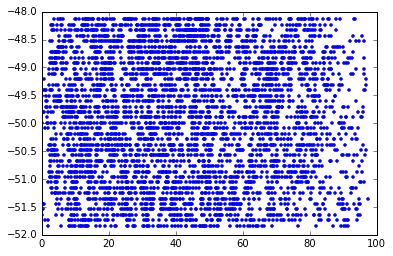

In [158]:
bin_mag, avg_overdensity, error_over = CalculateOverdensity(merged_des_st82, maglim_i_st82, nside = 512)
bin_mag2, avg_overdensity2, error_over2 = CalculateOverdensity(merged_des_patch, maglim_i_spt, nside = 512)

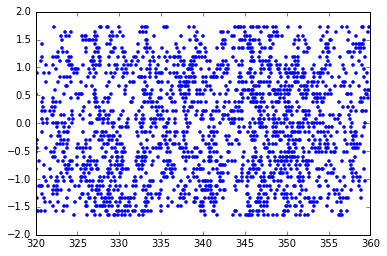

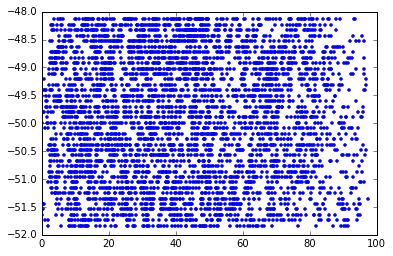

In [165]:
merged_des_st82_2 = merged_des_st82[merged_des_st82['MAG_AUTO_I_corrected']<= 21]
merged_des_patch_2 = merged_des_patch[merged_des_patch['MAG_AUTO_I_corrected']<= 21]
bin_mag3, avg_overdensity3, error_over3 = CalculateOverdensity(merged_des_st82_2, maglim_i_st82, nside = 512)
bin_mag4, avg_overdensity4, error_over4 = CalculateOverdensity(merged_des_patch_2, maglim_i_spt, nside = 512)

In [168]:
def chisquare_test(avg_overdensity, error_over):

    avg_overdensity = np.array(avg_overdensity)
    error_over = np.array(error_over)
    mask = np.ma.masked_invalid(avg_overdensity)
    #mask2 = np.ma.masked_invalid(error_over)
    m = ((~mask.mask) & (error_over != 0))
    #m2 = ~mask2.mask
    galaxy_density = avg_overdensity[m]
    err = error_over[m]
    bin = bin_mag[m]
    chisquare = np.sum((galaxy_density - 1.0)**2/err**2 )
    return chisquare/np.sum(m)

In [169]:
chi1 = chisquare_test(avg_overdensity, error_over)
chi2 = chisquare_test(avg_overdensity2, error_over2)

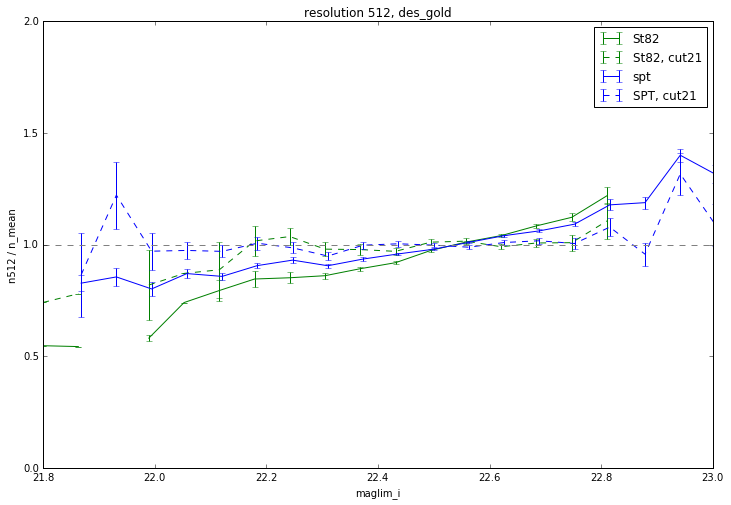

In [166]:
fig, ax = plt.subplots(1,1, figsize = (12, 8))
#ax.plot(maglim_i_256[bdmask][zeromask], overdensity, '.')
#ax.plot(bin_mag, avg_overdensity, '.')
ax.errorbar(bin_mag, avg_overdensity, yerr = error_over, color = 'green', label = 'St82')
ax.errorbar(bin_mag3, avg_overdensity3, yerr = error_over3, color = 'green', linestyle = '--', label = 'St82, cut21')
ax.errorbar(bin_mag2 + 0.005, avg_overdensity2, yerr = error_over2, color = 'blue', label = 'spt')
ax.errorbar(bin_mag4 + 0.005, avg_overdensity4, yerr = error_over4, color = 'blue', linestyle='--',label='SPT, cut21')
ax.axhline(y=1, color='grey', linestyle='--')
ax.set_xlabel('maglim_i')
ax.set_ylabel('n512 / n_mean')
ax.set_title('resolution 512, des_gold')
ax.set_ylim(0,2)
ax.set_xlim(21.8, 23)
ax.legend(loc='best')


## 
## 
## 
## Density comparison in SPT and stripe82

In [245]:
#ra = merged_des_patch_s['RA'][merged_des_patch_s['RA'] > 180] - 360
#merged_des_patch_s['RA'][merged_des_patch_s['RA'] > 180]  = ra

In [246]:
# dmass from spt
rabin = np.linspace(merged_des_patch_s['RA'].min(), merged_des_patch_s['RA'].max(), 15)
print rabin
ind_map = np.digitize(merged_des_patch_s['RA'], bins = rabin)

merged_des_patch_s_list = []
for i in range(1, rabin.size):
    ts = assignCMASSProb(merged_des_patch_s[ind_map == i] , clf_cmass, clf_no, cmass_fraction = cmass_fraction )
    merged_des_patch_s_list.append(ts)
    ts = None
merged_des_patch_s = np.hstack(merged_des_patch_s_list)

[  1.71000000e-04   2.57144427e+01   5.14287144e+01   7.71429861e+01
   1.02857258e+02   1.28571530e+02   1.54285801e+02   1.80000073e+02
   2.05714345e+02   2.31428616e+02   2.57142888e+02   2.82857160e+02
   3.08571432e+02   3.34285703e+02   3.59999975e+02]
calculate loglikelihood gaussian with multiprocessing module
multiprocessing 100 % 
calculate loglikelihood gaussian with multiprocessing module
multiprocessing 100 % 
calculate loglikelihood gaussian with multiprocessing module
multiprocessing 100 % 
calculate loglikelihood gaussian with multiprocessing module
multiprocessing 100 % 
calculate loglikelihood gaussian with multiprocessing module
multiprocessing 100 % 
calculate loglikelihood gaussian with multiprocessing module
multiprocessing 100 % 
calculate loglikelihood gaussian with multiprocessing module
multiprocessing 100 % 
calculate loglikelihood gaussian with multiprocessing module
multiprocessing 100 % 
calculate loglikelihood gaussian with multiprocessing module
multipr

In [267]:
#dmass_spt, _ = resampleWithPth( merged_des_patch_s, pstart = 0, pmax = 1.0 )
esutil.io.write('result_cat/gold_st82_23_cut21_dmass_spt.fits', dmass_spt, clobber = True)
esutil.io.write('result_cat/gold_st82_23_cut21_dmass_st82.fits', dmass, clobber = True)
#esutil.io.write('result_cat/gold_st82_23_cut21_merged_des_patch_s.fits', merged_des_patch_s, clobber = True)

merged_des_patch_s = fitsio.read('result_cat/gold_23_cut21_merged_des_patch_s.fits')
dmass_spt, _ = resampleWithPth( merged_des_patch_s, pstart = 0, pmax = 1.0 )

In [253]:
ra = dmass_spt['RA'][dmass_spt['RA'] < 0] + 360
dmass_spt['RA'][dmass_spt['RA'] < 0] = ra

In [254]:
dmass_full = np.hstack([dmass, dmass_spt])
#rand_test = uniform_random_on_sphere(dmass, size = 100 * dmass.size)
#rand_test = Cuts.keepGoodRegion(rand_test)
rand = uniform_random_on_sphere(dmass_full, size = 100 * dmass_full.size)
rand = Cuts.keepGoodRegion(rand)
rand_train = Cuts.SpatialCuts(rand, ra=320, ra2 = 360, dec = -2, dec2 = 2)
rand = rand[rand['DEC'] < -3]

Spatial Cut  54915


In [256]:
print dmass_spt.size *1./SPTMaparea /(clean_cmass_data_des.size *1./ ST82Maparea)
print (dmass.size *1./ ST82Maparea)/(clean_cmass_data_des.size *1./ ST82Maparea)
print dmass_spt.size *1./rand.size /(clean_cmass_data_des.size *1./ rand_train.size)
print (dmass.size *1./ rand_train.size)/(clean_cmass_data_des.size *1./ rand_train.size)

0.977835355581
1.04291952589
0.980864068353
1.04291952589


In [141]:
def CalculateNumDensity(cat, cleanMap):
    N_map = cleanMap.size
    pixarea = hp.nside2pixarea( 4096, degrees = True)
    A_map = N_map * pixarea
    num_density = cat.size * 1./A_map 
    return num_density

In [142]:
def CalculateNumDensity2(cat, random):
    num_density = cat.size * 1./random.size
    return num_density

In [143]:
# add jack knife error
def jkerror( catalog, cleanMap, njack = 10 ):
    import os

    # jk error
    jkfile = './jkregion.txt'
    jk.GenerateJKRegions( catalog['RA'], catalog['DEC'], njack, jkfile)
    jktest = jk.SphericalJK( target = CalculateNumDensity, jkargs=[catalog, cleanMap], \
                            jkargsby=[['RA', 'DEC'],['RA', 'DEC']], \
                            regions = jkfile)
    jktest.DoJK( regions = jkfile )
    jkresults = jktest.GetResults(jk=True, full = True)

    full_j = jkresults['full']   
    it = jkresults['it']
    it_j = jkresults['jk']
    
    norm = (njack-1)*1./njack
    #cov = np.std(it_j - full_j)**2 * norm
    cov = np.sum((it_j - it_j.mean())**2) * norm
    
    os.remove(jkfile)
    return np.mean(it_j), np.sqrt(cov)

In [327]:
rabin = np.linspace(0, 100, 8)
ind_map = np.digitize(merged_des_patch_s['RA'], bins = rabin)
ind_clean_map = np.digitize(GoldMask_spt['RA'], bins = rabin)

n_err = []
n_density = []

for i in range(1,rabin.size):
    ma = ind_map == i
    ma3 = ind_clean_map == i
    n, e = jkerror( merged_des_patch_s[ma], GoldMask_spt[ma3], njack = 20)    
    n_err.append(e)
    n_density.append(n)

n_err = np.array(n_err)
n_density = np.array(n_density)

X (1384, 2)  centers (20, 2)  tol=1e-05  maxiter=200
33 iterations  cluster sizes: [ 41  69  58  56  35  85  64  57  51  76 102  87  41  63  79  85  94  82
  56 103]
X (479098, 2)  centers (20, 2)  tol=1e-05  maxiter=200


KeyboardInterrupt: 

In [328]:
ind_dmass = np.digitize(dmass_spt['RA'], bins = rabin)
#ind_dmass21 = np.digitize(dmass_spt21['RA'], bins = rabin)
ind_clean_map = np.digitize(GoldMask_spt['RA'], bins = rabin)

n_err_dmass = []
n_density_dmass = []

for i in range(1,rabin.size):
    ma = ind_dmass == i
    #ma2 = ind_dmass21 == i
    ma3 = ind_clean_map == i

    n, e = jkerror( dmass_spt[ma], GoldMask_spt[ma3], njack = 20)   
    n_err_dmass.append(e)
    n_density_dmass.append(n)
    
n_err_dmass = np.array(n_err_dmass)
n_density_dmass = np.array(n_density_dmass)

X (200, 2)  centers (20, 2)  tol=1e-05  maxiter=200
13 iterations  cluster sizes: [16 18  5  7 12 11 12 14  8 11 11  7  9 13  4  6  4  8 13 11]
X (6978, 2)  centers (20, 2)  tol=1e-05  maxiter=200
23 iterations  cluster sizes: [400 551 247 399 220 326 401 389 234 448 390 418 403 377 264 277 252 369
 319 294]
X (206, 2)  centers (20, 2)  tol=1e-05  maxiter=200
13 iterations  cluster sizes: [12 11 13  7  1  9 14  7  9 13 11 13  5 11  9 16  9  7 14 15]
X (10619, 2)  centers (20, 2)  tol=1e-05  maxiter=200
59 iterations  cluster sizes: [439 499 416 512 517 714 534 560 460 598 538 478 542 371 669 538 544 546
 520 624]
X (217, 2)  centers (20, 2)  tol=1e-05  maxiter=200
8 iterations  cluster sizes: [15 17 12 10  6  6  7  8 13 12 12  7 15 12 24  8  6  9 11  7]
X (11787, 2)  centers (20, 2)  tol=1e-05  maxiter=200
78 iterations  cluster sizes: [697 540 539 527 674 429 519 549 583 597 663 486 686 655 626 497 655 740
 555 570]
X (216, 2)  centers (20, 2)  tol=1e-05  maxiter=200
14 iterations  cl

KeyboardInterrupt: 

In [80]:
density_dmass, error_dmass = jkerror( dmass_spt, GoldMask_spt, njack = 30) 
density_dmass_st82, error_dmass_st82 = jkerror( dmass, GoldMask_st82, njack = 10) 
density_dmass_true, error_dmass_true = jkerror( clean_cmass_data_des, GoldMask_st82, njack = 10) 

X (594, 2)  centers (30, 2)  tol=1e-05  maxiter=200
17 iterations  cluster sizes: [18 26 21 13 13 36 24 25 14 24 22 25  5 22  7 22 13  9 29 19 22 19 31 27 19
 20 11 18 17 23]
X (88301, 2)  centers (30, 2)  tol=1e-05  maxiter=200
49 iterations  cluster sizes: [2738 3167 3036 2049 2918 4769 2531 3185 3581 2658 2942 3071 2656 2138 2015
 3956 2576 2786 3483 2591 2721 2682 4438 2845 2655 3155 2471 2711 3143 2634]
X (181, 2)  centers (10, 2)  tol=1e-05  maxiter=200
16 iterations  cluster sizes: [16 11  6 21 27 27  4 11 35 23]
X (8265, 2)  centers (10, 2)  tol=1e-05  maxiter=200
48 iterations  cluster sizes: [855 795 852 727 794 915 915 830 806 776]
X (179, 2)  centers (10, 2)  tol=1e-05  maxiter=200
9 iterations  cluster sizes: [13  9 28 19 22 13 12  7 29 27]
X (8015, 2)  centers (10, 2)  tol=1e-05  maxiter=200
46 iterations  cluster sizes: [ 819  687  954  909  602  628  820  721 1038  837]


In [143]:
n_density_mean = CalculateNumDensity(merged_des_patch_s, GoldMask_spt)
#n_density_mean21 = CalculateNumDensity(merged_des_patch_s21, GoldMask_spt)

#n_density_true = CalculateNumDensity(des_train, GoldMask_st82_train)
n_density_true = CalculateNumDensity(merged_des_st82_s, GoldMask_st82)
#n_density_true21 = CalculateNumDensity(des_train[des_train['MAG_AUTO_I_corrected']< 21], GoldMask_st82_train)

n_density_dmass_st82_mean = CalculateNumDensity(dmass, GoldMask_st82)
n_density_dmass_mean = CalculateNumDensity(dmass_spt, GoldMask_spt)
#n_density_dmass_mean21 = CalculateNumDensity(dmass_spt21, GoldMask_spt)

n_density_dmass_true = CalculateNumDensity(clean_cmass_data_des, GoldMask_st82)
#n_density_dmass_true21 = CalculateNumDensity(cmass_train[cmass_train['MAG_AUTO_I_corrected']< 21], GoldMask_st82_train)

print n_density_dmass_true, n_density_dmass_mean, n_density_dmass_st82_mean
print \
n_density_mean / n_density_true, \
n_density_dmass_mean / n_density_dmass_true, \
n_density_dmass_st82_mean/ n_density_dmass_true

73.7282392816 69.7542188657 76.02793483
1.00336952443 0.946099073372 1.03119151591


In [144]:
# poisson
areafactor =  1. #np.sqrt(ST82Maparea/SPTMaparea)
sigma_f_true = np.sqrt(clean_cmass_data_des.size) *1./ST82Maparea * 1./n_density_dmass_true *areafactor
sigma_f_dmass_st82 = np.sqrt(dmass.size) *1./ST82Maparea * 1./n_density_dmass_true *areafactor
sigma_f_dmass = np.sqrt(dmass_spt.size) *1./SPTMaparea * 1./n_density_dmass_true
print sigma_f_true, sigma_f_dmass_st82, sigma_f_dmass

print error_dmass/n_density_dmass_true, error_dmass_st82/n_density_dmass_true, error_dmass_true/n_density_dmass_true

0.0111698730356 0.011342738042 0.00318385885173
0.0130309777515 0.0232406923081 0.0134001235416


In [145]:
print n_density_mean, n_density_true

4847.21159234 4830.93364339


(1, 1.0312058187716364) (1.0312058187716364, 0.023240692308074275) (0.94609741232697586, 0.013030977751452762)


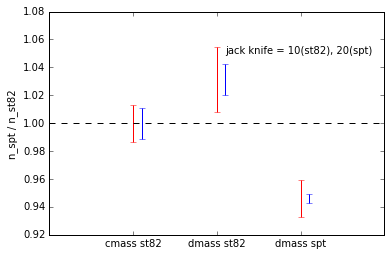

In [84]:
fig, ax = plt.subplots()
#ax.errorbar(1, 1, yerr = error_true/n_density_true, fmt='o', label='st82')
#ax.errorbar(2, density/density_true, yerr = error/n_density_true, fmt='o', label='spt')
ax.errorbar(3, 1, yerr = error_dmass_true/n_density_dmass_true , label='cmass st82',color = 'red')
ax.errorbar(4, density_dmass_st82/n_density_dmass_true, yerr = error_dmass_st82/n_density_dmass_true,label='dmass st82',color = 'red')
ax.errorbar(5, density_dmass/n_density_dmass_true,yerr = error_dmass/n_density_dmass_true, label='dmass spt',color = 'red')

ax.errorbar(3+0.1, 1, yerr = sigma_f_true, label='cmass st82, poisson', color = 'blue')
ax.errorbar(4+0.1, density_dmass_st82/n_density_dmass_true, yerr = sigma_f_dmass_st82,label='dmass st82, poisson',color = 'blue')
ax.errorbar(5+0.1, density_dmass/n_density_dmass_true,yerr = sigma_f_dmass, label='dmass spt, poisson',color = 'blue')

#ax.errorbar(5, density_dmass21/density_dmass_true21, yerr = error_dmass21/density_dmass_true21, label='dmass spt 21')
ax.axhline(y = 1, color = 'black', linestyle='--')
ax.set_xlim(2, 6)
ax.set_ylim(0.92, 1.08)
ax.set_ylabel('n_spt / n_st82')
ax.get_xaxis().set_ticks([3,4,5])
ax.get_xaxis().set_ticklabels(['cmass st82','dmass st82', 'dmass spt'])
#ax.legend(loc=None)
ax.text(4.1, 1.05, 'jack knife = 10(st82), 20(spt)')
fig.savefig('figure/total_density_comparison.png')


print (1, density_dmass_st82/n_density_dmass_true), (density_dmass_st82/n_density_dmass_true, error_dmass_st82/n_density_dmass_true), \
(density_dmass/n_density_dmass_true,error_dmass/n_density_dmass_true )

In [85]:
DAT = np.column_stack((n_density/n_density_true, n_err/n_density_true, n_density_dmass/n_density_dmass_true, n_err_dmass/n_density_dmass_true))
np.savetxt('data_txt/num_density_comparison_nocut.txt', DAT, header = 'n_spt/n_st82, spt_error, n_dmass_spt/n_cmass, dmass_error')

NameError: name 'n_density' is not defined

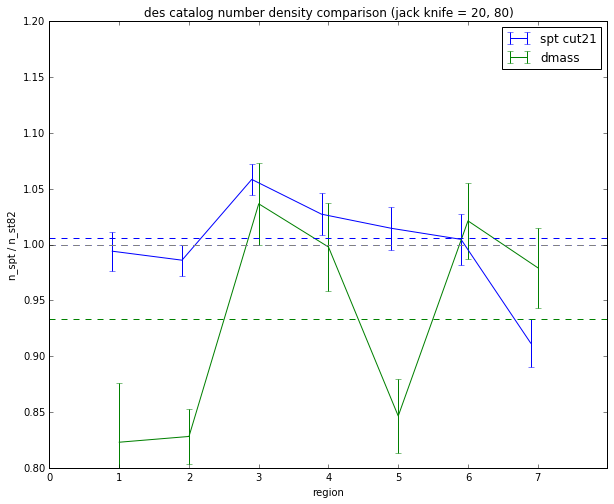

In [157]:

DAT = np.loadtxt('data_txt/num_density_comparison.txt')
n_density_21, n_err21, n_density_dmass_21, n_err_dmass21 = [DAT[:,i] for i in range(4)]

fig, ax = plt.subplots(1,1, figsize = (10,8))
ax.errorbar(np.arange(1, rabin.size)-0.1, n_density/n_density_true, yerr = n_err/n_density_true, color = 'blue', label='spt cut21')
#ax.errorbar(np.arange(1, rabin.size), n_density_21, yerr = n_err21, color = 'red', label='spt cut 21')
ax.errorbar(np.arange(1, rabin.size), n_density_dmass/n_density_dmass_true, yerr = n_err_dmass/n_density_dmass_true, color = 'green', label='dmass')
#ax.errorbar(np.arange(1, rabin.size), n_density_dmass/n_density_dmass_true, yerr = n_err_dmass/n_density_dmass_true, color = 'green', label='dmass')
#ax.errorbar(np.arange(1, rabin.size)+0.2, n_density_dmass_21, yerr = n_err_dmass21, color = 'cyan', label='dmass, spt21')
ax.axhline(y = np.mean(n_density)/n_density_true, color = 'blue', linestyle='--')

#ax.axhline(y = np.mean(n_density21)/n_density_true21, color = 'red', linestyle='--')
#ax.axhline(y = np.mean(n_density_dmass21)/n_density_dmass_true21, color = 'cyan', linestyle='--')
ax.axhline(y = n_density_mean/n_density_true, color = 'blue', linestyle='--')
#ax.axhline(y = np.mean(n_density_21), color = 'red', linestyle='--')
#ax.axhline(y = np.mean(n_density_dmass_21), color = 'cyan', linestyle='--')
#ax.axhline(y = 1.0, color = 'blue', linestyle='--')
ax.axhline(y=1.0, color = 'grey', linestyle='--')
ax.set_title('des catalog number density comparison (jack knife = 20, 80)')
ax.set_xlabel('region')
ax.set_ylabel('n_spt / n_st82')
ax.legend(loc ='best')
ax.set_xlim(0, rabin.size)
ax.set_ylim(0.8, 1.2)
ax.axhline(y = np.mean(n_density_dmass)/n_density_dmass_true, color = 'green', linestyle='--')

ax.get_xaxis().set_ticks(np.arange(rabin.size))

#ax.text(10, 1.3, ' jack knife = 80  ',verticalalignment = 'top', horizontalalignment = 'right')
ax.legend(loc ='best')

fig.savefig('figure/n_density_comparison.png')

----

# Bias test  

In [178]:
def getavgbias( cat, pstart=0.0 ):
    from systematics_module.contCorrection import logL_from_mag,logL_to_galaxyBias
    mag = cat['MAG_MODEL_I_corrected']
    z = cat['DESDM_ZP']
    logL = logL_from_mag( mag = mag, z = z )
    avg_b = logL_to_galaxyBias(logL = logL)
    print 'avg bias=',avg_b, ' sample size=', mag.size
    return avg_b

In [134]:
dmass_spt, _ = resampleWithPth( resample, pstart = 0, pmax = 1.0 )
dmass, _ = resampleWithPth( merged_des_st82_s, pstart = 0, pmax = 1.0 )

In [137]:
avg_b_cmass = getavgbias( clean_cmass_data_des )
avg_b_dmass1 = getavgbias( dmass_spt )
avg_b_dmass2 = getavgbias( dmass )

print 'bias ratio b_dmass/b_cmass, spt', avg_b_dmass1 * 100/ avg_b_cmass, '%'
print 'bias ratio b_dmass/b_cmass, st82', avg_b_dmass2 * 100/ avg_b_cmass, '%'

avg bias= 1.16593250562  sample size= 8015
avg bias= 6.1945939811  sample size= 76800
avg bias= 1.16140910488  sample size= 8265
bias ratio b_dmass/b_cmass, spt 531.299535027 %
bias ratio b_dmass/b_cmass, st82 99.6120357978 %


In [62]:
ra = dmass_spt['RA'][dmass_spt['RA'] > 180 ] -360.
dmass_spt['RA'][dmass_spt['RA'] > 180 ] = ra

#ra = rand['RA'][rand['RA'] > 180 ] -360.
#rand['RA'][rand['RA'] > 180 ] = ra

avg bias= 1.14704644391  sample size= 198
avg bias= 1.13365667542  sample size= 262
avg bias= 1.17612202455  sample size= 552
avg bias= 1.15850747175  sample size= 1274
avg bias= 1.12601204284  sample size= 1288
avg bias= 1.09821794582  sample size= 496
avg bias= 1.10712736077  sample size= 163
avg bias= 1.17008159632  sample size= 35
avg bias= 1.30203553084  sample size= 130
avg bias= 1.13855248088  sample size= 1110
avg bias= 1.68428886873  sample size= 909
avg bias= 1.17345126661  sample size= 483
avg bias= 1.14861602612  sample size= 2187
avg bias= 1.16751671764  sample size= 2656
avg bias= 1.19196877305  sample size= 2736
avg bias= 1.12874356129  sample size= 2647
avg bias= 1.1339760364  sample size= 3040
avg bias= 1.11726551013  sample size= 329
avg bias= 1.12483393488  sample size= 474
avg bias= 1.17183602542  sample size= 2506
avg bias= 1.14264087307  sample size= 2684
avg bias= 1.18697928047  sample size= 1695
avg bias= 1.17162686084  sample size= 2389
avg bias= 1.15544330641 

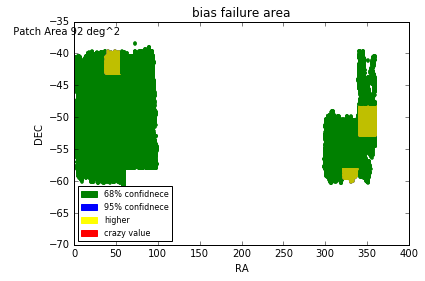

In [190]:
# stat error

radec = 'RA'
radec2 = 'DEC'
rabin, step = np.linspace(dmass_spt[radec].min(), dmass_spt[radec].max(), 20, retstep = True)
decbin, step2 = np.linspace(dmass_spt[radec2].min(), dmass_spt[radec2].max(), 7, retstep = True)

avg_b_dmass2 = np.zeros((rabin.size-1, decbin.size -1))
N_rand_all = np.zeros((rabin.size-1, decbin.size -1))

for j in range(decbin.size -1):
    for i in range(rabin.size-1):
        ma = ((dmass_spt['RA'] >= rabin[i]) & (dmass_spt['RA'] < rabin[i+1]) & \
              (dmass_spt['DEC'] >= decbin[j]) & (dmass_spt['DEC'] < decbin[j+1]))
        ma2 = ((rand['RA'] >= rabin[i]) & (rand['RA'] < rabin[i+1]) & \
              (rand['DEC'] >= decbin[j]) & (rand['DEC'] < decbin[j+1]))
        if np.sum(ma2) == 0: pass
        else : 
            avg_b_dmass2[i,j] = getavgbias( dmass_spt[ma] )
            N_rand_all[i,j] = np.sum(ma2)

            
spt_mask = (N_rand_all > 0 ) & (avg_b_dmass2 < 3.0) #N_rand_all.mean() * 0.001) 
defined_sigma_st82 = np.std(avg_b_dmass2[spt_mask])
mean_b = avg_b_dmass2[spt_mask].mean()

fig, ax = plt.subplots()

for j in range(decbin.size -1):
    for i in range(rabin.size-1):
        ma = ((dmass_spt['RA'] >= rabin[i]) & (dmass_spt['RA'] < rabin[i+1]) & \
              (dmass_spt['DEC'] >= decbin[j]) & (dmass_spt['DEC'] < decbin[j+1]))
        ma2 = ((rand['RA'] >= rabin[i]) & (rand['RA'] < rabin[i+1]) & \
              (rand['DEC'] >= decbin[j]) & (rand['DEC'] < decbin[j+1]))
        
        if np.sum(ma2) == 0: pass
        else :    
            if (avg_b_dmass2[i,j] > mean_b + defined_sigma_st82) or (avg_b_dmass2[i,j] < mean_b - defined_sigma_st82):
                ax.plot(dmass_spt[ma]['RA'], dmass_spt[ma]['DEC'], 'b.')  
                if (avg_b_dmass2[i,j] > mean_b + 2 * defined_sigma_st82) or (avg_b_dmass2[i,j] < mean_b - 2 * defined_sigma_st82):
                    ax.plot(dmass_spt[ma]['RA'], dmass_spt[ma]['DEC'], 'y.')  
                if avg_b_dmass2[i,j] > 100 : ax.plot(dmass_spt[ma]['RA'], dmass_spt[ma]['DEC'], 'r.') 
            else : ax.plot(dmass_spt[ma]['RA'], dmass_spt[ma]['DEC'], 'g.') 
        

ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.set_title ( 'bias failure area')
ax.text( -80, -37, '  Patch Area {:0.0f} deg^2'.format(step*step2))

avg_b_dmass2 = avg_b_dmass2.ravel()
N_rand_all = N_rand_all.ravel()

import matplotlib.patches as mpatches
green_patch = mpatches.Patch(color='green', label='68% confidnece')
blue_patch = mpatches.Patch(color='blue', label='95% confidnece')
yellow_patch = mpatches.Patch(color='yellow', label='higher')
red_patch = mpatches.Patch(color='red', label='crazy value')
plt.legend(handles=[green_patch, blue_patch,yellow_patch,red_patch], loc = 3, prop={'size':8} )

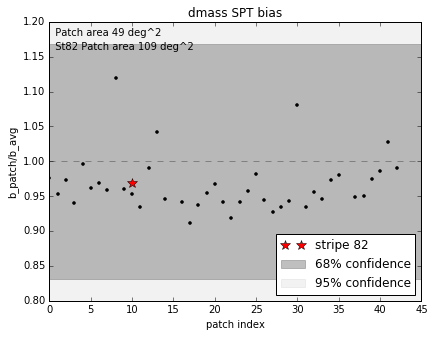

In [264]:

# MOCK --------------------------------------
spt_mask = (N_rand_all > N_rand_all.mean() * 0.2 ) & (avg_b_dmass2 < 3.0) #N_rand_all.mean() * 0.001) 
sigma_f_spt = 0.01 # np.sqrt(avg_b_dmass2[spt_mask]) / np.sqrt(np.sum(spt_mask))/avg_b_cmass
#sigma_f_st82 = (np.sqrt(dmass_st82.size) *1./ random_st82.size * 1./mean_spt)
mean_b = avg_b_dmass2[spt_mask].mean()
defined_sigma_st82 = np.std(avg_b_dmass2[spt_mask])

# plot------------------
fig,ax = plt.subplots(1, 1, figsize = (20/3., 5))

ax.axhspan( 1. - defined_sigma_st82/mean_b, 1 + defined_sigma_st82/mean_b, alpha=0.5, color='grey', label = '68% confidence')
ax.axhspan( 1. - 2*defined_sigma_st82/mean_b, 1 + 2*defined_sigma_st82/mean_b, alpha=0.1, color='grey',label = '95% confidence')

ax.plot( np.arange(np.sum(spt_mask)), avg_b_dmass2[spt_mask]/mean_b, 'k.')
ax.plot( 10, avg_b_cmass/mean_b, 'r*', markersize = 10, label = 'stripe 82')
#ax.errorbar( 1, n_density_st82/mean_spt, yerr = sigma_f_st82, fmt='none', ecolor = 'red', label = 'stripe82' )
ax.axhline(y = 1, linestyle='--', color = 'grey')
ax.set_title('dmass SPT bias')
ax.set_ylim(0.8, 1.2)
ax.set_ylabel('b_patch/b_avg')
ax.set_xlabel('patch index')
ax.text(0, 1.18, '  Patch area {:0.0f} deg^2'.format(step * step2))
ax.text(0, 1.16, '  St82 Patch area {:0.0f} deg^2'.format(109))
ax.legend(loc = 4)




----

# Number density test


#### Sampling in each region 

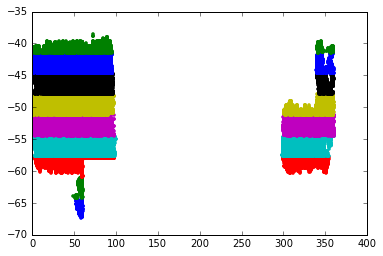

In [475]:
# stat error

radec = 'RA'
radec2 = 'DEC'
rabin, step = np.linspace(merged_des_patch_s[radec].min(), merged_des_patch_s[radec].max(), 2, retstep = True)
decbin, step2 = np.linspace(merged_des_patch_s[radec2].min(), merged_des_patch_s[radec2].max(), 10, retstep = True)


dmass_spt = []
fig, ax = plt.subplots()
for j in range(decbin.size -1):
    for i in range(rabin.size-1):
        ma = ((merged_des_patch_s['RA'] >= rabin[i]) & (merged_des_patch_s['RA'] < rabin[i+1]) & \
              (merged_des_patch_s['DEC'] >= decbin[j]) & (merged_des_patch_s['DEC'] < decbin[j+1]))
        
        if np.sum(ma) == 0: pass
        else : 
            ds, _ = resampleWithPth( merged_des_patch_s[ma], pstart = 0, pmax = 1.0 )   
            dmass_spt.append(ds)
            #rows = np.random.choice( np.sum(ma), size = np.sum(ma)/100)
            ax.plot(ds['RA'], ds['DEC'], '.') 
            ds = None

dmass_spt = np.hstack(dmass_spt)
esutil.io.write('result_cat/gold_st82_23_cut21_dmass_spt.fits', dmass_spt, clobber = True)
ra = dmass_spt['RA'][dmass_spt['RA'] > 180 ] - 360.
dmass_spt['RA'][dmass_spt['RA'] > 180 ] = ra

#### Sampling from random samples 

||||||||||||||||||||

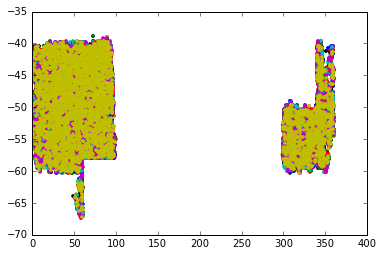

In [470]:
index = np.arange(merged_des_patch_s.size)
np.random.shuffle(index)
index = np.array_split(index, 20)

dmass_spt = []
fig, ax = plt.subplots()
for i in range(len(index)):

    mask = np.zeros(merged_des_patch_s.size, dtype = bool)
    mask[index[i]] = 1
    ds, _ = resampleWithPth( merged_des_patch_s[mask], pstart = 0, pmax = 1.0 )   
    dmass_spt.append(ds)
    sys.stdout.write('|')
    sys.stdout.flush()
    ax.plot(ds['RA'], ds['DEC'], '.') 
    ds = None
    
dmass_spt = np.hstack(dmass_spt)
esutil.io.write('result_cat/gold_st82_23_cut21_dmass_spt.fits', dmass_spt, clobber = True)
ra = dmass_spt['RA'][dmass_spt['RA'] > 180 ] - 360.
dmass_spt['RA'][dmass_spt['RA'] > 180 ] = ra

#### Number density plot 

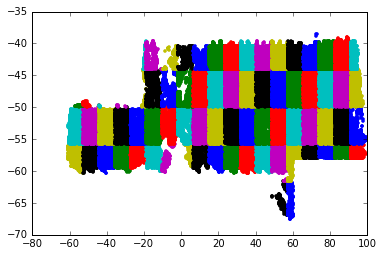

In [263]:
# stat error
#dmass_spt = esutil.io.read('result_cat/gold_st82_23_cut21_dmass_spt.fits')

radec = 'RA'
radec2 = 'DEC'
#rabin, step = np.linspace(-62, 100, 10, retstep = True)
#decbin, step2 = np.linspace(-70, -35, 7, retstep = True)
rabin, step = np.linspace(dmass_spt[radec].min(), dmass_spt[radec].max(), 20, retstep = True)
decbin, step2 = np.linspace(dmass_spt[radec2].min(), dmass_spt[radec2].max(), 6, retstep = True)

Maparea_spt = np.zeros((rabin.size-1, decbin.size -1))
#n_err = []
n_density_spt = np.zeros((rabin.size-1, decbin.size -1))
N_spt = np.zeros((rabin.size-1, decbin.size -1))

fig, ax = plt.subplots()
for j in range(decbin.size -1):
    for i in range(rabin.size-1):
        ma = ((dmass_spt['RA'] >= rabin[i]) & (dmass_spt['RA'] < rabin[i+1]) & \
              (dmass_spt['DEC'] >= decbin[j]) & (dmass_spt['DEC'] < decbin[j+1]))
        ma3 = ((GoldMask_spt['RA'] >= rabin[i]) & (GoldMask_spt['RA'] < rabin[i+1]) & \
              (GoldMask_spt['DEC'] >= decbin[j]) & (GoldMask_spt['DEC'] < decbin[j+1]))

        n_density_spt[i,j] = CalculateNumDensity(dmass_spt[ma], GoldMask_spt[ma3])
        N_spt[i,j], Maparea_spt[i,j] = np.sum(ma), np.sum(ma3)*pixarea
        ax.plot(dmass_spt[ma]['RA'], dmass_spt[ma]['DEC'], '.')  
        
Maparea_spt = Maparea_spt.ravel()
n_density_spt = n_density_spt.ravel()
N_spt = N_spt.ravel()

In [193]:
n_density_st82 = CalculateNumDensity(clean_cmass_data_des, GoldMask_st82)
n_density_st = CalculateNumDensity(dmass, GoldMask_st82)
print n_density_st82, n_density_st
print mean_spt

73.7282392816 76.02793483
60.9737747029


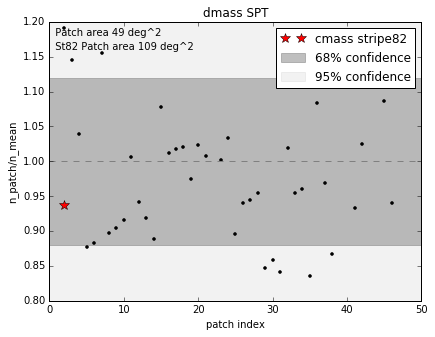

In [265]:
# MOCK --------------------------------------

spt_mask = (Maparea_spt > step*step2* 0.1) & (n_density_spt > 0)
mean_spt = n_density_spt[spt_mask].mean() 

#n_density_st82 = CalculateNumDensity(clean_cmass_data_des, GoldMask_st82)
n_density_st82 = CalculateNumDensity(dmass, GoldMask_st82)
# Define st82 number density uncertainty ----
defined_sigma_st82 = np.std(n_density_spt[spt_mask])

# plot------------------
fig,ax = plt.subplots(1, 1, figsize = (20/3., 5))
ax.axhspan( 1. - defined_sigma_st82/mean_spt, 1 + defined_sigma_st82/mean_spt, alpha=0.5, color='grey', label = '68% confidence')
ax.axhspan( 1. - 2*defined_sigma_st82/mean_spt, 1 + 2*defined_sigma_st82/mean_spt, alpha=0.1, color='grey',label = '95% confidence')
ax.plot( np.arange(np.sum(spt_mask)), n_density_spt[spt_mask]/mean_spt, 'k.' )
ax.plot( 2, n_density_st82/mean_spt, 'r*', markersize = 10, label = 'cmass stripe82' )
ax.axhline(y = 1, linestyle='--', color = 'grey')
ax.set_title('dmass SPT')
ax.set_ylim(0.8, 1.2)
ax.set_ylabel('n_patch/n_mean')
ax.set_xlabel('patch index')
ax.text(0, 1.18, '  Patch area {:0.0f} deg^2'.format(step * step2))
ax.text(0, 1.16, '  St82 Patch area {:0.0f} deg^2'.format(109))
ax.legend(loc = 1)


----

# Match distributions

In [44]:
factor = N_st *1./np.sum(N_st) /(N_spt *1./np.sum(N_spt))
print factor

[ 1.48419003  1.49279794  1.52185017  1.37258629  1.38165987  1.49011668
  1.30817601  1.30290228  1.24584824  1.29123979  1.23205877  1.16764143
  1.19831125  1.12314834  1.10736383  1.07894316  1.1209672   1.0762555
  1.05206978  1.05128549  1.00852942  1.03354233  1.05511164  1.03824814
  1.0021226   1.07060934  1.02971925  1.03524701  1.03165603  1.03188314
  1.04147237  1.02860967  1.03961837  1.03465392  1.03254754  1.03390916
  1.04107149  1.03719583  1.03753557  1.05205209  1.04425313  1.02959909
  1.01835847  1.01694618  1.02235591  1.02275932  1.01551585  1.02027012
  1.01921478  0.97389815  1.0018702   1.00205228  1.00030643  0.98809507
  1.01976825  1.01046938  1.02594836  1.01198838  1.00024783  1.01781407
  0.99878536  1.01333303  1.02275931  1.01363236  0.99997495  1.02925078
  1.03951668  1.01695542  1.03343164  1.02988718  1.02492213  1.03679055
  1.02003006  1.04626231  1.03500917  1.02951213  1.04506958  0.99941646
  0.99371894  1.01425728  0.99700643  0.99545761  0.

In [290]:
#merged_des_st82_s
#merged_des_patch_s

bins, step = np.linspace(0, 2.0, 100, retstep = True)
N_st, _ = np.histogram( merged_des_st82_s['MAG_DETMODEL_G_corrected'] - merged_des_st82_s['MAG_DETMODEL_R_corrected'], bins = bins)
N_spt, _ = np.histogram( merged_des_patch_s['MAG_DETMODEL_G_corrected'] - merged_des_patch_s['MAG_DETMODEL_R_corrected'], bins = bins)

factor = N_st *1./np.sum(N_st) /(N_spt *1./np.sum(N_spt))

ind = np.digitize(merged_des_patch_s['MAG_DETMODEL_G_corrected'] - merged_des_patch_s['MAG_DETMODEL_R_corrected'], bins = bins )



print 'g-r difference histogram'
print 'bin number', bins.size
print 'spt/st82 ', merged_des_st82_s.size, merged_des_patch_s.size
print '------------------------'
print 'multiprocessing\n'
resample = []
for i in range(1, bins.size):
    mask = ind == i
    if np.sum(mask) ==0 : pass
    else : 
        if factor[i-1] > 1.0: pass
            #factor[i-1] = 1
        re = np.random.choice(merged_des_patch_s[mask], size = int(np.sum(mask) * factor[i-1]) )
        resample.append(re)
        
        d = i *1./bins.size * 100
        sys.stdout.write('\r|{0:32}🐤|{1:3.0f}%'.format(' '*int(d/4.)+'💕🐰',d ))                        
sys.stdout.write('\r|{0:32}🐤|{1:3.0f}%'.format(' '*int(d/4.)+'💜🐰',100 ))

resample = np.hstack(resample)

g-r difference histogram
bin number 100
spt/st82  525171 6136025
------------------------
multiprocessing

|                        💜🐰🐤|100%

writing output plot to: figure/gold_st82_23_cut21_st82_diagnostic_histograms_1d.png


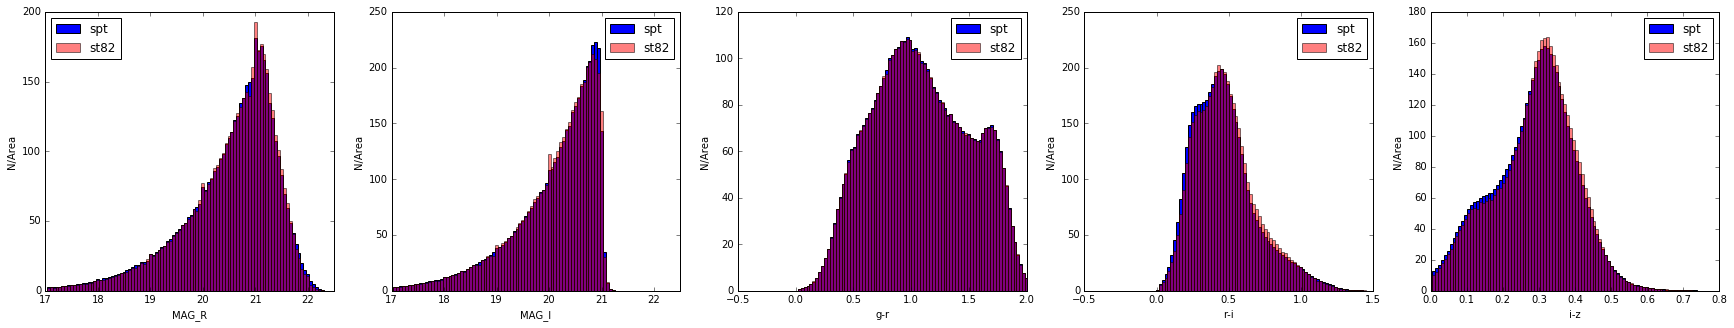

In [282]:
# Plotting all
labels = ['MAG_R', 'MAG_I', 'g-r', 'r-i', 'i-z']
ranges =  [[17,22.5], [17,22.5], [-0.5,2], [-.5,1.5], [0.0,.8]]

X_train, Xcov_train = mixing_color(merged_des_st82_s)
X_test,_ = mixing_color(resample)
doVisualization_1d_NperA( X_train, X_test, labels = labels, ranges = ranges,\
                         name =['st82','spt' ], area=[ST82Maparea, SPTMaparea], nbins=100, prefix='gold_st82_23_cut21_st82_')

writing output plot to: figure/gold_st82_23_cut21_gr_diagnostic_histograms_1d.png


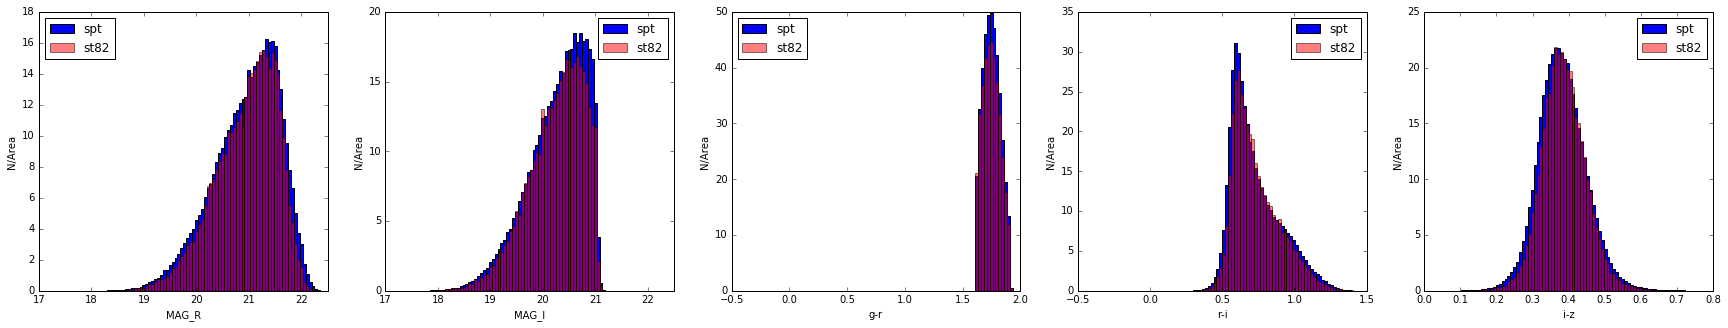

In [184]:
merged_gr_mask = ((merged_des_st82_s['MAG_MODEL_G_corrected'] - merged_des_st82_s['MAG_MODEL_R_corrected'] >= 1.6) &\
                 (merged_des_st82_s['MAG_MODEL_G_corrected'] - merged_des_st82_s['MAG_MODEL_R_corrected'] < 1.9) & \
                 (merged_des_st82_s['MAG_DETMODEL_G_corrected'] - merged_des_st82_s['MAG_DETMODEL_R_corrected'] >= 1.6) & \
                 (merged_des_st82_s['MAG_DETMODEL_G_corrected'] - merged_des_st82_s['MAG_DETMODEL_R_corrected'] < 1.9))
merged_gr_spt_mask = ((resample['MAG_MODEL_G_corrected'] - resample['MAG_MODEL_R_corrected'] >= 1.6) &\
                     (resample['MAG_MODEL_G_corrected'] - resample['MAG_MODEL_R_corrected'] < 1.9) & \
                     (resample['MAG_DETMODEL_G_corrected'] - resample['MAG_DETMODEL_R_corrected'] >= 1.6) &\
                     (resample['MAG_DETMODEL_G_corrected'] - resample['MAG_DETMODEL_R_corrected'] < 1.9))

merged_gr = merged_des_st82_s[merged_gr_mask]
merged_gr_spt = resample[merged_gr_spt_mask]

X_st82, Xcov_st82 = mixing_color(merged_gr)
X_spt,_ = mixing_color(merged_gr_spt)
doVisualization_1d_NperA( X_st82, X_spt, labels = labels, ranges = ranges,\
                         name =['st82','spt' ], area=[ST82Maparea,SPTMaparea], nbins=100, prefix='gold_st82_23_cut21_gr_')
